-------------------------------------------------------------------------------
1. Solve a system of linear equations (Gaussian ELimination & Gauss-Seidel)
2. Run generate test (Gaussian Elimination vs Gauss-Seidel)
3. Run special numerical problem - second order ordinary differential equation
E. Exit
-------------------------------------------------------------------------------
Your MENU option: 3
Do you want to use default or customized test (D/C)
Your choice: d


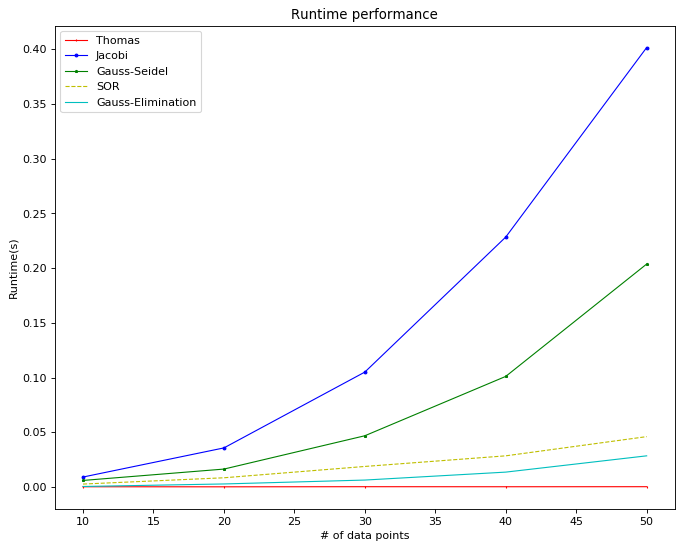

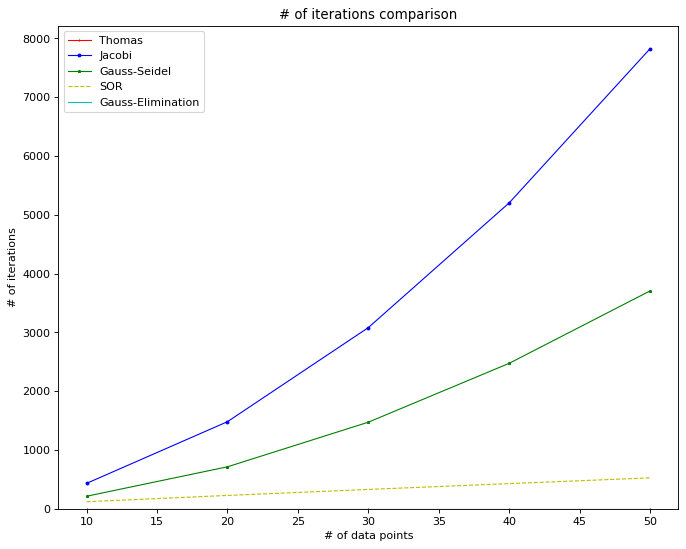

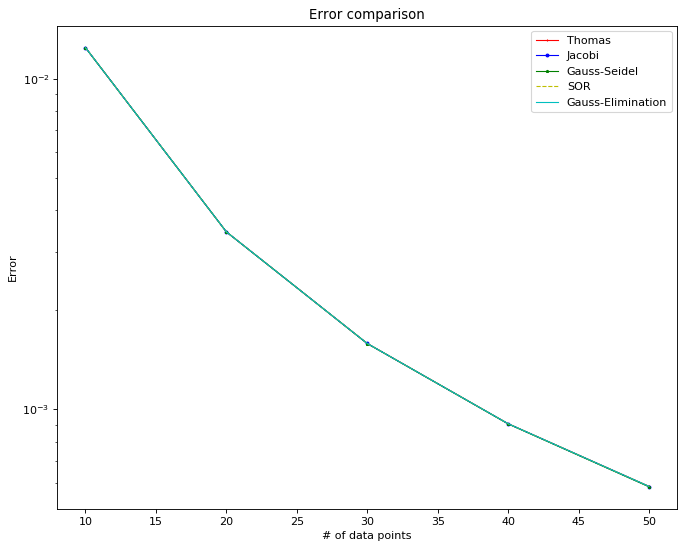

Your MENU option: 4
Exiting...


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 12 16:35:45 2020

@author: yongjiaxu
"""
import matplotlib.pyplot as plt
import scipy.linalg as linalg 
import numpy as np
from timeit import default_timer as timer
from sys import argv
import import_ipynb
import matGenerator
import glob
import solvers
import ode_2nd

def solve_single_matrix(path):
    f = open(path)
    # extract matrix from the file
    size = int(f.readline())
    A = []; a = []; b = []
    for i in range(size):
        line = f.readline()
        lineList = line.split(" ")
        temp = []
        for k in lineList:
            temp.append(float(k))
        A.append(temp)
        temp2 = temp.copy()
        b.append(temp2.pop())
        a.append(temp2)
    f.close()

    #convert to ndarray for unification
    A = np.array(A)
    a = np.array(a)
    b = np.array(b)
    x = np.zeros(size)

    start1 = timer()
    solGE = solvers.gaussElim(A)
    end1 = timer()
    GEt = end1 - start1
    
    start2 = timer()
    solGS = solvers.gaussSeidel(a, x, b)
    end2 = timer()
    GSt = end2 - start2
    
    start3 = timer()
    c,_,_,_ = linalg.lstsq(a, b)
    end3 = timer()
    scipyT = end3 - start3  
    
    return solGE, solGS, c, GEt, GSt, scipyT, size


def general_test(path = '/Users/yongjiaxu/Desktop/CS3353/Program4/CS3353-Project4/small'):
    s = []; GEtime = {}; GStime = {}; scipyTime = {}   
    files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]
    for f in files:
        solGE, solGS, c, GEt, GSt, scipyT, size = solve_single_matrix(f)
        
        # since the sequence of files are random; dictionary keeps track of the size & timing
        GEtime[size] = GEt
        GStime[size] = GSt
        scipyTime[size] = scipyT
        s.append(size)        
        
    s.sort()
    GEy = []
    GSy = []
    scipyy = []
    for i in s:
        GEy.append(GEtime[i])
        GSy.append(GStime[i])
        scipyy.append(scipyTime[i])

    # plot the data
    fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(s, GEy, '-*', markersize = 5, label = 'GE')
    plt.plot(s, GSy, '-x', markersize = 5, label = 'GS')
    plt.plot(s, scipyy, '-o', markersize = 3, label = 'scipy')
    plt.legend()
    plt.xlabel('size of matrix (nxn)')
    plt.ylabel('Runtime (s)')
    plt.title('GE vs GS vs Scipy')
#    plt.savefig('GEvsGSvsScipy.png')
    plt.show()
    
    return


if __name__ == "__main__":
    
    # for github action
    if(len(argv) == 2):
        path = argv[1]
        solGE, solGS, c, GEt, GSt, scipyT, size = solve_single_matrix(path)
        print('Solutions:')
        print ('Gauss Elimination: {}'.format(solGE))
        print ('Gauss-Seidel: {}'.format(solGS))
        print ('Scipy: {}'.format(c))
    
        print('Runtime:')        
        print ('Gauss Elimination: ', GEt, 's')
        print ('Gauss-Seidel: ',GSt, 's')
        print ('Scipy: ',scipyT, 's')
            
    else:
        print('-------------------------------------------------------------------------------')
        print('1. Solve a system of linear equations (Gaussian ELimination & Gauss-Seidel)')
        print('2. Run generate test (Gaussian Elimination vs Gauss-Seidel)')
        print('3. Run special numerical problem - second order ordinary differential equation')
        print('E. Exit')
        print('-------------------------------------------------------------------------------')
        
        while(True):
        
            option = input('Your MENU option: ')
            
            if(option == '1'):
                path = input('Enter your path to file: ')
                solGE, solGS, c, GEt, GSt, scipyT, size = solve_single_matrix(path)
                print('Solutions:')
                print ('Gauss Elimination: {}'.format(solGE))
                print ('Gauss-Seidel: {}'.format(solGS))
                print ('Scipy: {}'.format(c))
            
                print('Runtime:')        
                print ('Gauss Elimination: ', GEt, 's')
                print ('Gauss-Seidel: ',GSt, 's')
                print ('Scipy: ',scipyT, 's')
            
            elif(option == '2'):
                # Part I: general matrix solving
                print('Do you want to use default or customized test (D/C)')
                while(True):
                    s = input('Your choice: ')
                    if (s == 'c') | (s == 'C'):
                        path = input('Please enter your directory: ')
                        general_test(path)
                        break;
                    elif (s == 'd') | (s == 'D'):
                        print('Using default path...')
                        general_test()
                        break;
                
            elif (option == '3'):
                # Part II: a specific numerical problem: 2nd order differential equation
                # Ay'' + By' + C = r(x); y(a) = alpha; y(b) = beta; 
                # Requirement: analytical solution: s1; right hand side: r(x); coefficients [A B C];
                #  endpoints xa, xb
                
                s1 = lambda x: (2*np.exp(1))*x*(np.exp(-x)) - np.exp(x)
                rf1 = lambda x: -4*(np.exp(x))
                xa1 = 0; xb1 = 2; coeff1 = [1,2,1]
                
        
                # ode_interface() requires arguments: initial values of the ode: s, rf, xa, xb, coeff
                # it also has default arguments: n, m, T, I, E
                # n - data points; m - methods; T - display runtim; I - display # of iterations; E - error
                # default settings are n = [10,20,30]
                
                print('Do you want to use default or customized test (D/C)')
                while(True):
                    c = input('Your choice: ')
                    
                    if ( c =='D') | (c =='d'):
                        ode_2nd.ode_interface(s1, rf1, xa1, xb1, coeff1)
                        break;
                    elif (c == 'C') | (c == 'c'):
                        n = []
                        print('Please enter a list of desired data points; press E to stop entering')
                        while(True):
                            s = input('Please enter a number of data points: ')
                            if((s == 'e') | (s == 'E')):
                                break;
                            try:
                                int(s)
                            except ValueError:
                                print('Please enter an integer')
                                continue
                            if (s in n):
                                print('{} is already chosen'.format(s))
                                continue
                            n.append(int(s))
                
                        m = []
                        print('Please choose solving method; press E to stop entering')
                        print('0 - Thomas algorithm')
                        print('1 - Jacobi iterative method')
                        print('2 - Gauss-Seidel iterative method')
                        print('3 - Successive over-relaxation (SOR)')
                        print('4 - Gaussian Elimination')
                        while(True):
                            s = input('Please choose your method: ')
                            if((s == 'e') | (s == 'E')):
                                break
                            try:
                                int(s)
                            except ValueError:
                                print('Please enter an integer.')
                                continue
                            x = int(s)
                            if (x < 0) & (x > 4):
                                print('You chose {}'.format(x))
                                print('Please choose a valid method.')
                                continue
                            if (x in m):
                                print('{} is already chosen.'.format(x))
                                continue
                            m.append(int(s))  
                        
                        tDisplay = True
                        iDisplay = True
                        eDisplay = True
                        print('Do you want to display runtime performance?')
                        while (True):
                            s = input('Yes or No (Y/N): ')
                            if (s == 'y') | (s == 'Y') | (s == 'yes') | (s == 'Yes'):
                                break;
                            elif (s == 'n') | (s == 'N') | (s == 'no') | (s == 'No'):
                                tDisplay = False
                                break;
        
                        print('Do you want to display # of iterations(only for Jacobi, Gauss-Seidel, and SOR)?')
                        while (True):
                            s = input('Yes or No (Y/N): ')
                            if (s == 'y') | (s == 'Y') | (s == 'yes') | (s == 'Yes'):
                                break;
                            elif (s == 'n') | (s == 'N') | (s == 'no') | (s == 'No'):
                                iDisplay = False
                                break;
        
                        print('Do you want to display error between real values and numerical solutions?')
                        while (True):
                            s = input('Yes or No (Y/N): ')
                            if (s == 'y') | (s == 'Y') | (s == 'yes') | (s == 'Yes'):
                                break;
                            elif (s == 'n') | (s == 'N') | (s == 'no') | (s == 'No'):
                                eDisplay = False
                                break;
                                
                        ode_2nd.ode_interface(s1, rf1, xa1, xb1, coeff1, n = n, m = m, T = tDisplay, I = iDisplay, E = eDisplay)
                        break;
                
                
            # generate converging matrix for gauss seidel
            # hidden option - for 'maintenence' purpose
            elif (option == 'm'):
                size = input('Please enter your matrix size: ')
                save_path = input('Please enter your saving path: ')
                matGenerator.writeFile(size, save_path)
    
            elif ((option == 'e' )| (option == 'E')|(option == '4')):
                print('Exiting...')
                break;            
                
            else:
                print('Please enter a valid option.')
    